In [2]:
# Geospatial Analysis:

# Visualize the geographical distribution of hydropower projects using longitude and latitude.
# Identify clusters of projects in specific regions.
import pandas as pd

df = pd.read_csv("./hydropower_dataset.csv")

# Replace the string '-' with NaN
df.replace("-", pd.NA, inplace=True)

# Convert date columns to datetime format
date_columns = ["Isuue Date", "Validity"]
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors="coerce", format="%m/%d/%Y")


# Drop rows with missing values
df_cleaned = df.dropna()


# Replace '0' with NaN
df.replace("0", pd.NA, inplace=True)

# Optionally, you can write the cleaned data back to a new CSV file
df_cleaned.to_csv("cleaned_datas.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_datas.csv'

In [3]:
df.head()

,_id,Project,Province,District,Municipality,Capacity (MW),River,Lic No,Isuue Date,Validity,Promoter,Address,Longitude,Latitude,License Type
0,1,Aayu Chhatigad Hydropower Project,Province 7,DARCHULA,Apihimal,13.942,Chatti Gad,798,2073-12-21,2075-12-20,Puwa Khola-1 Hydro Power Pvt.Ltd.,"Anamnagar-32,Kathmandu,Nepal. GPO 20863, 41027...",80.881528,29.820139,Survey
1,2,Aayu Malun Khola Hydro-Electric Project,Province 1,SOLUKHUMBU,Solududhakunda,21.000,Malun,807,2074-01-15,2076-01-14,Puwa Khola-1 Hydropower Private Limited,"Anamnagar-32, Kathmandu Nepal",86.425556,27.376944,Survey
2,3,Adhikhola Storage HEP,Province 5,PALPA,Bagnaskali,180.000,Adhikhola,821,2074-02-04,2076-02-03,Nepal Electricity Authority,"Nepal Electricity Authority, Central Office Du...",83.666667,27.950000,Survey
3,4,Akhu Khola-2 HPP,Province 4,GORKHA,Aarughat,20.000,Akhu Khola,749,2073-07-29,2075-07-28,Gorakshya Hydropower Pvt. Ltd.,"House no.319,Babarmahal, Kathmandu, 4219730,42...",84.962639,28.040139,Survey
4,5,Andhi Khola,Province 4,SYANGJA,Bhirkot,9.400,Andhi Khola,2_gtd,2052-01-08,2101-12-30,Butwal Power Company,<NA>,83.680972,27.938333,Operation


     _id                                  Project    Province       District  \
0      1        Aayu Chhatigad Hydropower Project  Province 7       DARCHULA   
1      2  Aayu Malun Khola Hydro-Electric Project  Province 1     SOLUKHUMBU   
2      3                    Adhikhola Storage HEP  Province 5          PALPA   
3      4                         Akhu Khola-2 HPP  Province 4         GORKHA   
4      5                              Andhi Khola  Province 4        SYANGJA   
..   ...                                      ...         ...            ...   
520  568                        Upper Trishuli 3B  Province 3         RASUWA   
521  569                         Upper Trishuli-1  Province 3         RASUWA   
522  570             Upper Trishuli-I Cascade HEP  Province 3         RASUWA   
523  571    Uttarganga Storage Hydropower Project  Province 4        BAGLUNG   
524  572                          Yambaling Khola  Province 3  SINDHUPALCHOK   

       Municipality  Capacity (MW)     

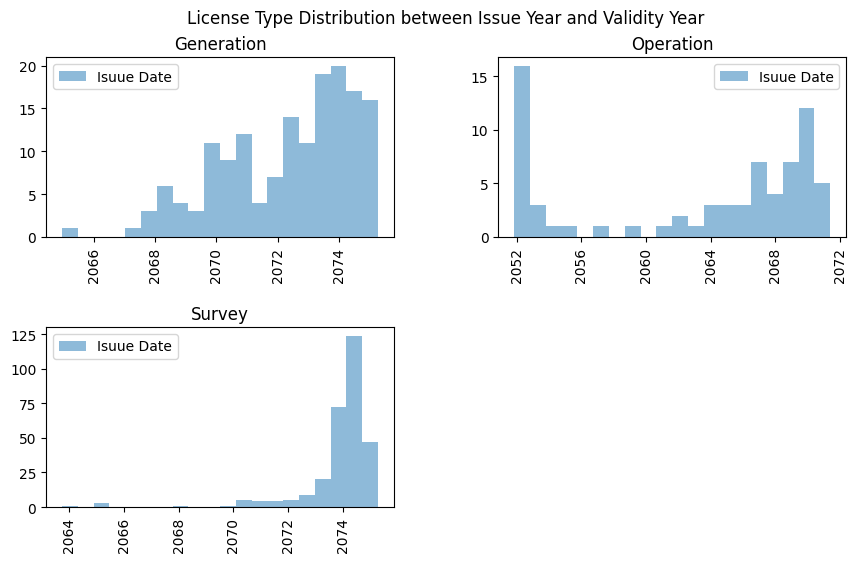

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./cleaned_datas.csv")

# Create a DataFrame
df = pd.DataFrame(data)
print(df)

# Converting "Isuue Date" and "Validity" columns to datetime
df["Isuue Date"] = pd.to_datetime(df["Isuue Date"])
df["Validity"] = pd.to_datetime(df["Validity"])

# Plotting a histogram
df["Isuue Date"].hist(
    by=df["License Type"], alpha=0.5, bins=20, figsize=(10, 6), legend=True
)

plt.suptitle("License Type Distribution between Issue Year and Validity Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

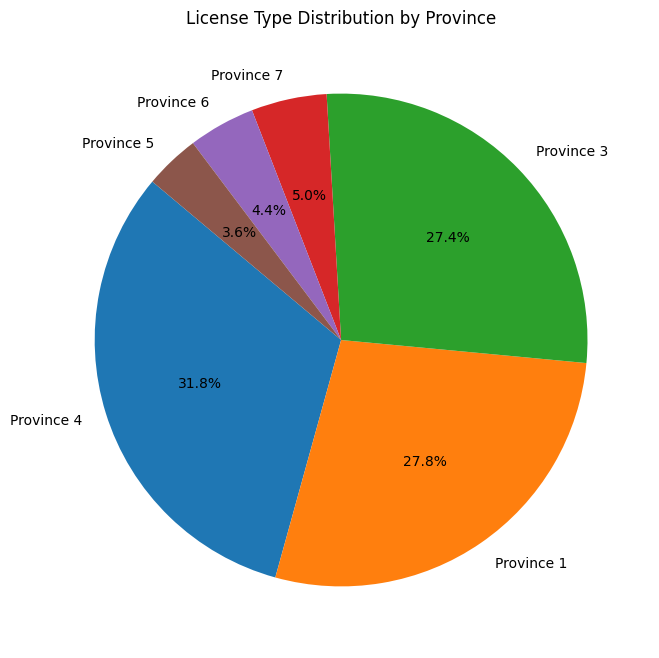

In [5]:
data = pd.read_csv("./cleaned_datas.csv")

# Creating a DataFrame
df = pd.DataFrame(data)

# Counting occurrences of each License Type in each Province
province_license_counts = df["Province"].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    province_license_counts,
    labels=province_license_counts.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("License Type Distribution by Province")
plt.show()

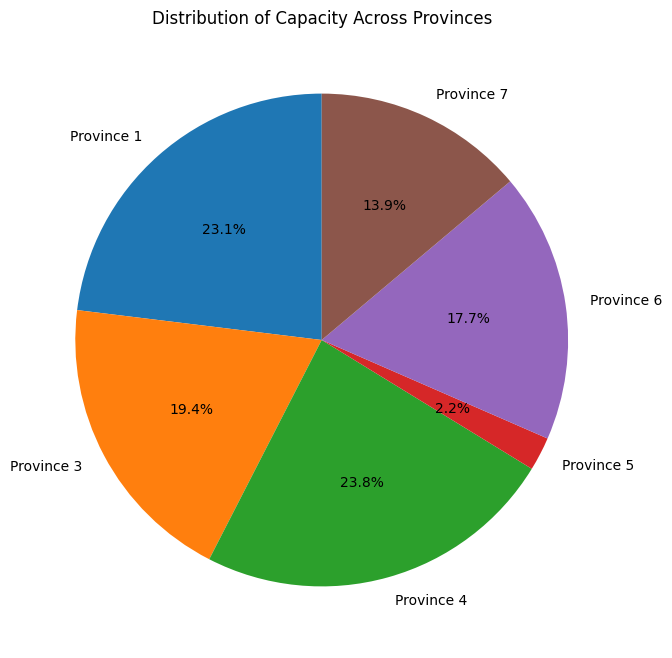

In [6]:
data = pd.read_csv("cleaned_datas.csv")

# Creating a DataFrame
df = pd.DataFrame(data)

# Grouping by Province and calculating the total capacity
province_capacity = df.groupby("Province")["Capacity (MW)"].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
province_capacity.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Capacity Across Provinces")
plt.ylabel("")
plt.show()

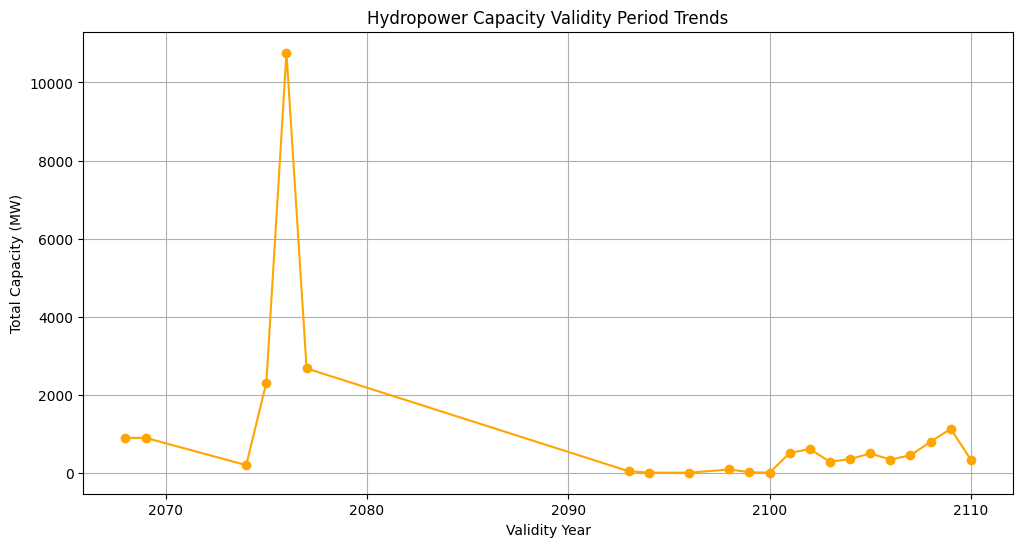

In [7]:
df = pd.read_csv("./cleaned_datas.csv")


# Line plot for validity period trends
plt.figure(figsize=(12, 6))
df["Validity"] = pd.to_datetime(df["Validity"])
df.groupby(df["Validity"].dt.year)["Capacity (MW)"].sum().plot(
    marker="o", color="orange"
)
plt.title("Hydropower Capacity Validity Period Trends")
plt.xlabel("Validity Year")
plt.ylabel("Total Capacity (MW)")
plt.grid(True)
plt.show()

Hydropower projects with the highest capacity:
                      Project  Capacity (MW)
274  Mugu Karnali Storage HEP         1902.0

Distribution of projects across provinces:
     Province  Project
0  Province 1      146
1  Province 3      144
2  Province 4      167
3  Province 5       19
4  Province 6       23
5  Province 7       26

Distribution of projects across districts:
           District  Project
0            ACHHAM        1
1           BAGLUNG       10
2           BAJHANG       10
3            BAJURA        3
4           BHOJPUR        7
5          CHITAWAN        1
6           DAILEKH        2
7          DARCHULA        9
8           DHADING       13
9           DOLAKHA       38
10            DOLPA        2
11             DOTI        2
12           GORKHA       29
13            GULMI        4
14            HUMLA        4
15             ILAM       19
16         JAJARKOT        7
17            JUMLA        3
18  KABHREPALANCHOK        4
19          KAILALI        1
20   

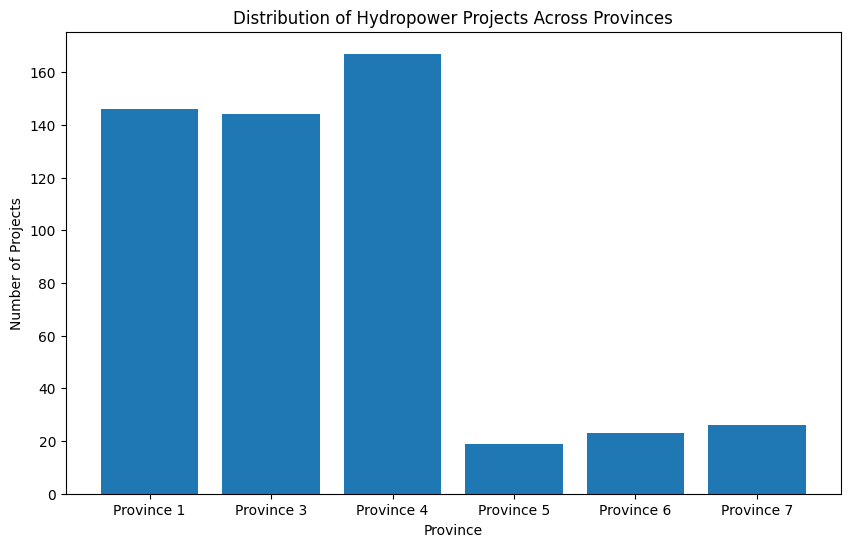

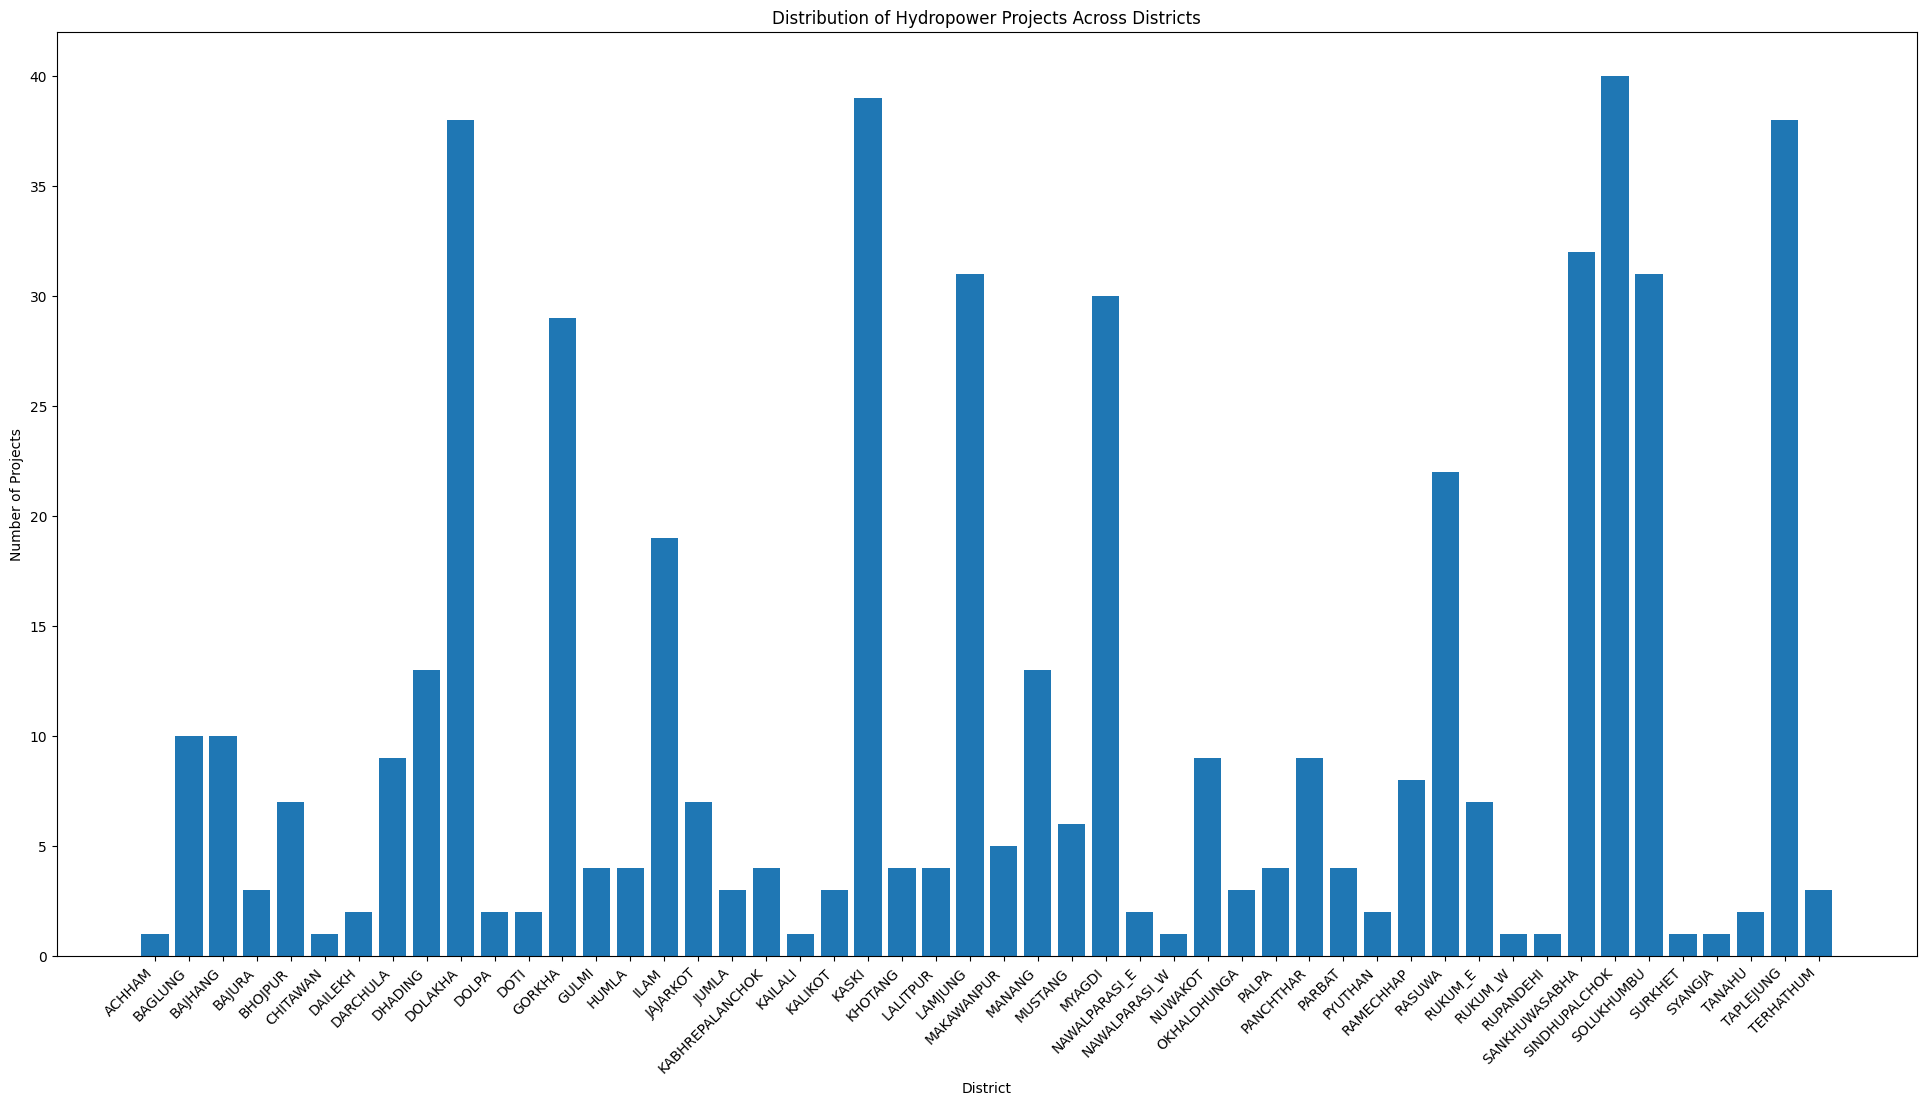

In [8]:
data = pd.read_csv("./cleaned_datas.csv")

# Creating a DataFrame
df = pd.DataFrame(data)

# Convert 'Capacity (MW)' to numeric for sorting
df["Capacity (MW)"] = pd.to_numeric(df["Capacity (MW)"], errors="coerce")

# Identify and list the hydropower projects with the highest capacity
highest_capacity_projects = df[df["Capacity (MW)"] == df["Capacity (MW)"].max()]
print("Hydropower projects with the highest capacity:")
print(highest_capacity_projects[["Project", "Capacity (MW)"]])

# Distribution of projects across provinces
projects_by_province = df.groupby("Province")["Project"].count().reset_index()

# Distribution of projects across districts
projects_by_district = df.groupby("District")["Project"].count().reset_index()

print("\nDistribution of projects across provinces:")
print(projects_by_province)

print("\nDistribution of projects across districts:")
print(projects_by_district)

plt.figure(figsize=(10, 6))
plt.bar(projects_by_province["Province"], projects_by_province["Project"])
plt.title("Distribution of Hydropower Projects Across Provinces")
plt.xlabel("Province")
plt.ylabel("Number of Projects")
plt.show()

plt.figure(figsize=(24, 12))
plt.bar(projects_by_district["District"], projects_by_district["Project"])
plt.title("Distribution of Hydropower Projects Across Districts")
plt.xlabel("District")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45, ha="right")
plt.show()

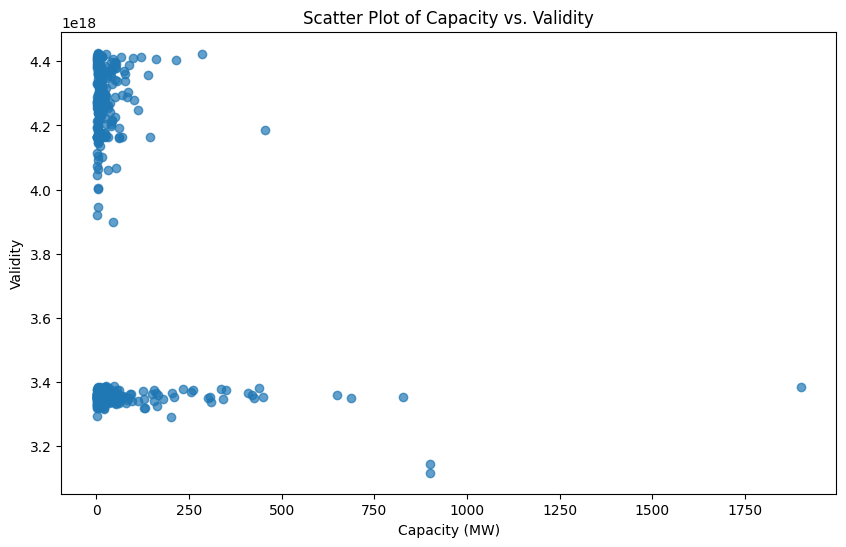

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./cleaned_datas.csv")
df['Validity'] = pd.to_datetime(df['Validity'])
df['Capacity (MW)'] = pd.to_numeric(df['Capacity (MW)'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(df['Capacity (MW)'], df['Validity'].view('int64'), alpha=0.7)

plt.xlabel('Capacity (MW)')
plt.ylabel('Validity')
plt.title('Scatter Plot of Capacity vs. Validity')

plt.show()

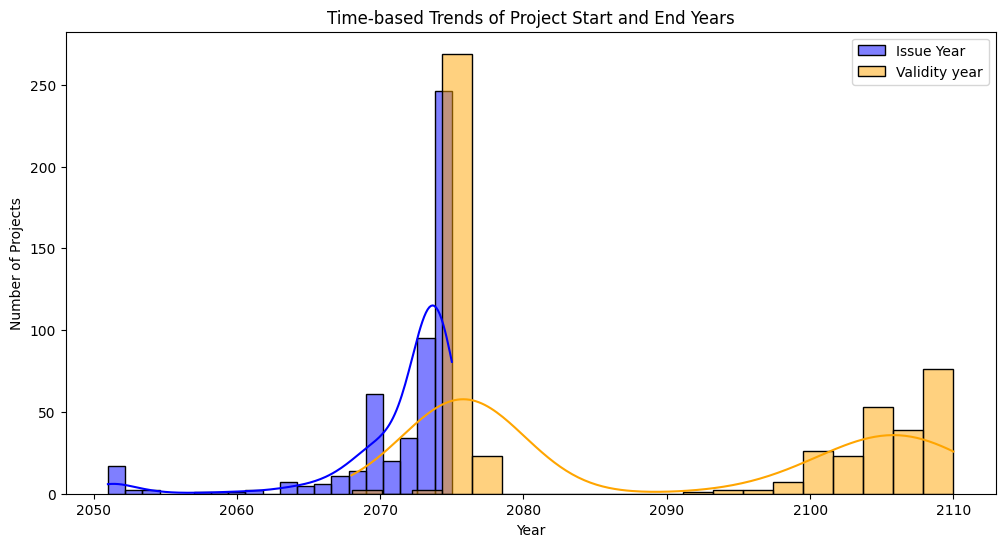

In [10]:
import seaborn as sns

df = pd.read_csv("./cleaned_datas.csv")

df["Isuue Date"] = pd.to_datetime(df["Isuue Date"])
df["Validity"] = pd.to_datetime(df["Validity"])

df["Start Year"] = df["Isuue Date"].dt.year
df["End Year"] = df["Validity"].dt.year

plt.figure(figsize=(12, 6))

sns.histplot(df["Start Year"], bins=20, kde=True, color="blue", label="Issue Year")

sns.histplot(df["End Year"], bins=20, kde=True, color="orange", label="Validity year")

plt.title("Time-based Trends of Project Start and End Years")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.legend()
plt.show()

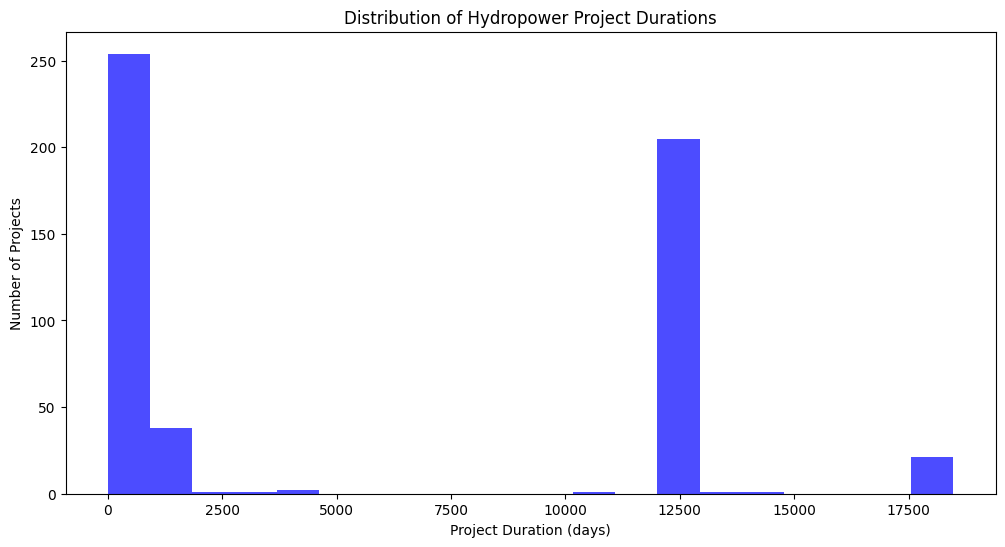

Region with the oldest hydropower projects: Province 3
Region with the newest hydropower projects: Province 1
Project with the longest running duration: Chilime
Project with the fastest shutting down duration: Khani Khola Small HPP


In [11]:
df['Isuue Date'] = pd.to_datetime(df['Isuue Date'])
df['Validity'] = pd.to_datetime(df['Validity'])

df['Project Duration'] = df['Validity'] - df['Isuue Date']

oldest_project_region = df.loc[df['Isuue Date'].idxmin()]['Province']
newest_project_region = df.loc[df['Isuue Date'].idxmax()]['Province']

longest_running_project = df.loc[df['Project Duration'].idxmax()]['Project']
fastest_shutting_down_project = df.loc[df['Project Duration'].idxmin()]['Project']

plt.figure(figsize=(12, 6))
plt.hist(df['Project Duration'].dt.days, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Hydropower Project Durations')
plt.xlabel('Project Duration (days)')
plt.ylabel('Number of Projects')
plt.show()

print("Region with the oldest hydropower projects:", oldest_project_region)
print("Region with the newest hydropower projects:", newest_project_region)
print("Project with the longest running duration:", longest_running_project)
print("Project with the fastest shutting down duration:", fastest_shutting_down_project)


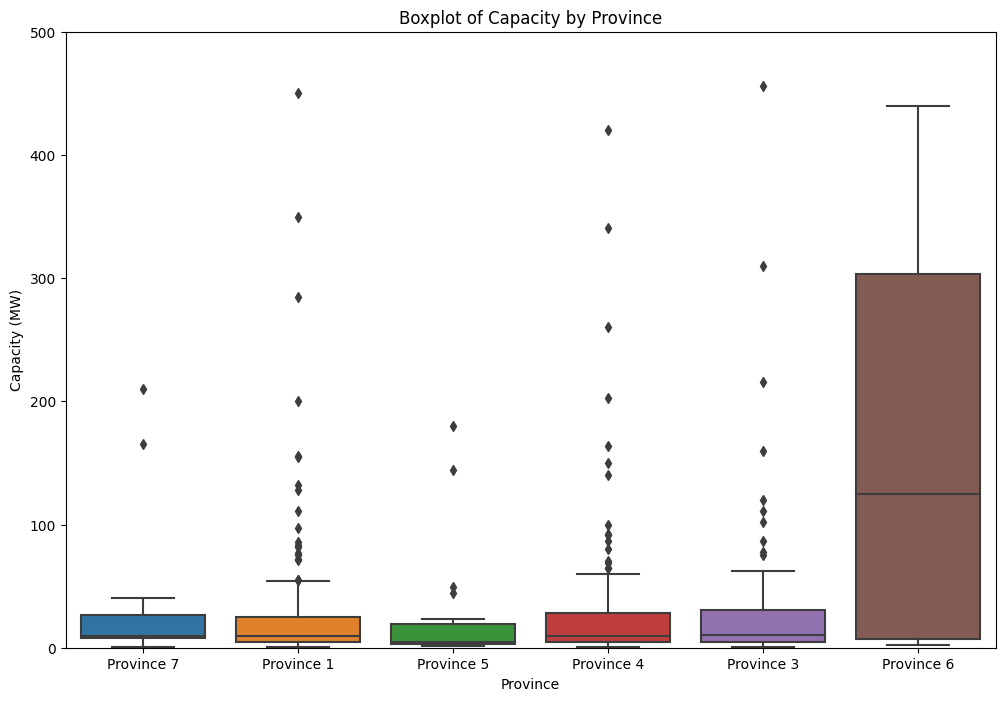

In [12]:
plt.figure(figsize=(12, 8))

plt.ylim(0, 500)  

sns.boxplot(x='Province', y='Capacity (MW)', data=df)
plt.title('Boxplot of Capacity by Province')
plt.xlabel('Province')
plt.ylabel('Capacity (MW)')
plt.show()

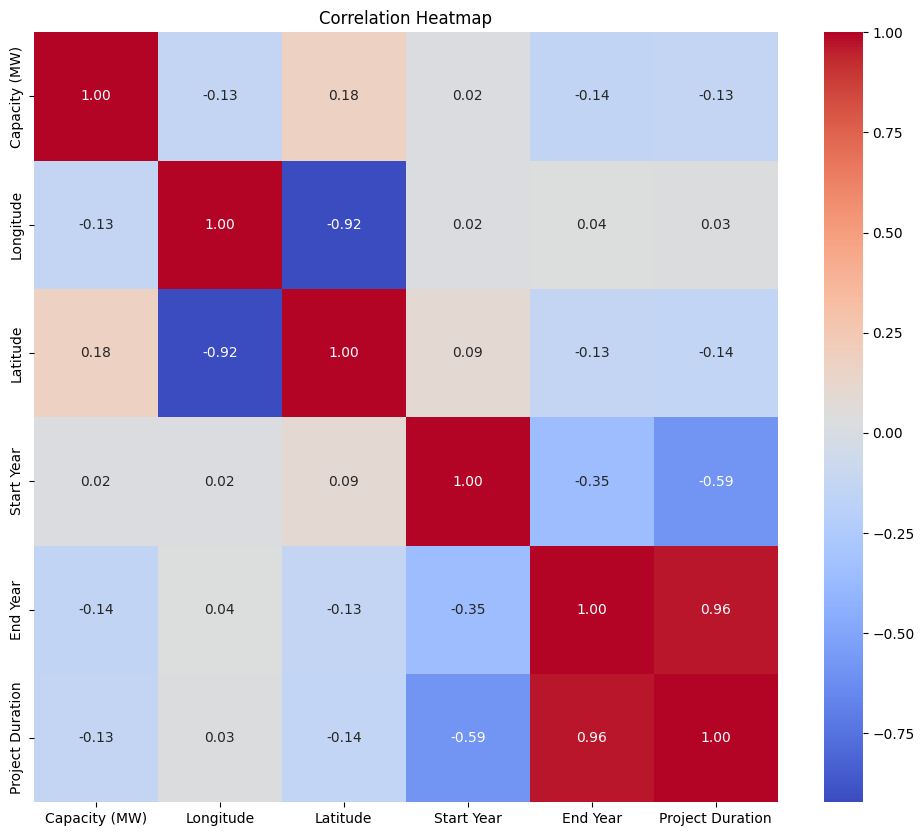

In [14]:
matrix = df.drop(['_id', 'Project', 'Province', 'District', 'Municipality', 'River', 'Lic No', 'Isuue Date', 'Validity', 'Promoter', 'Address', 'License Type'], axis=1)

# Calculate correlation matrix
correlation_matrix = matrix.corr()

#Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

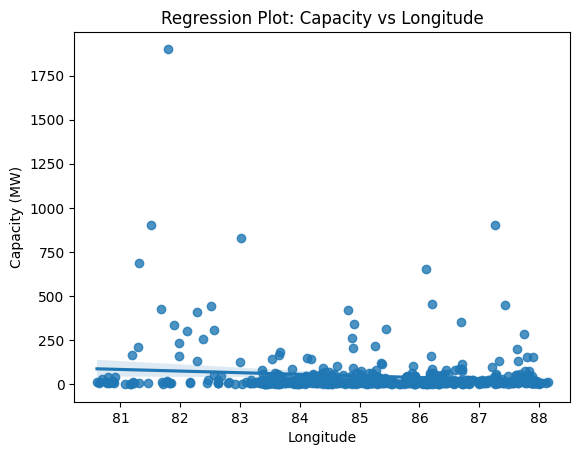

In [15]:
sns.regplot(x='Longitude', y='Capacity (MW)', data=df)
plt.title('Regression Plot: Capacity vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Capacity (MW)')
plt.show()

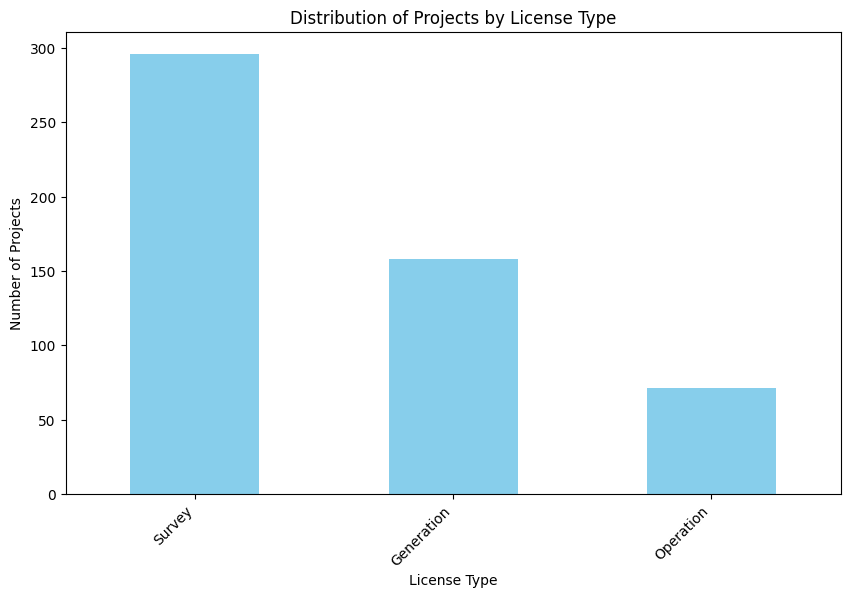

In [24]:
# Count projects by License Type
license_type_counts = df['License Type'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
license_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Projects by License Type')
plt.xlabel('License Type')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.show()

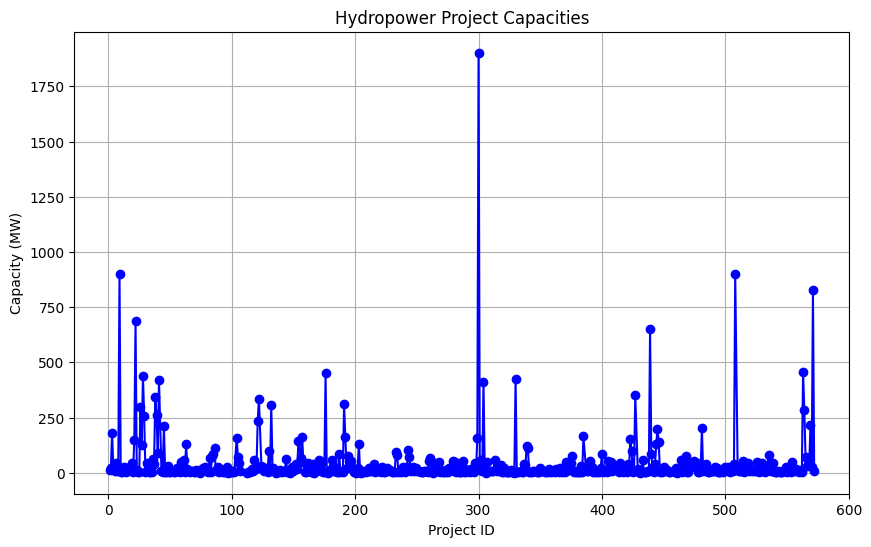

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['_id'], df['Capacity (MW)'], marker='o', linestyle='-', color='b')
plt.title('Hydropower Project Capacities')
plt.xlabel('Project ID')
plt.ylabel('Capacity (MW)')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

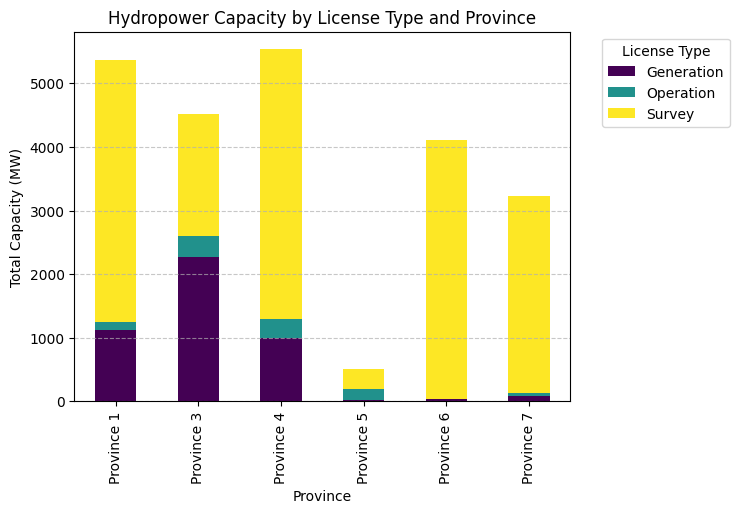

In [37]:
df_pivot = df.pivot_table(index='Province', columns='License Type', values='Capacity (MW)', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
df_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Hydropower Capacity by License Type and Province')
plt.xlabel('Province')
plt.ylabel('Total Capacity (MW)')
plt.legend(title='License Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()